NUMBER RECOGNIZATION

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [63]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [64]:
train_data.shape

(42000, 785)

In [65]:
test_data.shape

(28000, 784)

In [66]:
train_data.isna().any()

label       False
pixel0      False
pixel1      False
pixel2      False
pixel3      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 785, dtype: bool

In [67]:
test_data.isna().any()

pixel0      False
pixel1      False
pixel2      False
pixel3      False
pixel4      False
            ...  
pixel779    False
pixel780    False
pixel781    False
pixel782    False
pixel783    False
Length: 784, dtype: bool

In [68]:
X = train_data.drop(columns=['label'])

In [69]:
X = X / 255.0

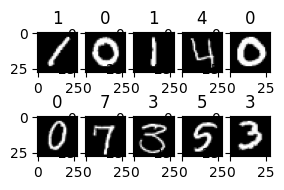

In [70]:
plt.figure(figsize=(3,2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X.values[i].reshape(28, 28), cmap='gray')
    plt.title(train_data['label'][i])
plt.show()

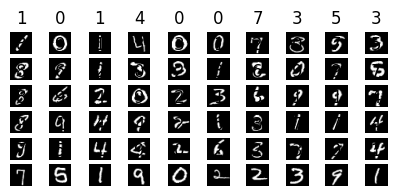

In [71]:
n_rows = 6
n_cols = 10
n_images = n_rows * n_cols

# Create a figure with a grid of images
plt.figure(figsize=(5, 2))
for i in range(n_images):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X.values[i].reshape(28, 28), cmap='gray')
    plt.title(train_data['label'][i])
    plt.axis('off')

plt.show()

In [72]:
y = train_data['label']
y = to_categorical(y, 10)

In [73]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [81]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [83]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5
525/525 [==============================] - 8s 12ms/step - loss: 0.3475 - accuracy: 0.9000 - val_loss: 0.1861 - val_accuracy: 0.9449
Epoch 2/5
525/525 [==============================] - 4s 7ms/step - loss: 0.1479 - accuracy: 0.9556 - val_loss: 0.1423 - val_accuracy: 0.9569
Epoch 3/5
525/525 [==============================] - 2s 4ms/step - loss: 0.1027 - accuracy: 0.9701 - val_loss: 0.1270 - val_accuracy: 0.9614
Epoch 4/5
525/525 [==============================] - 2s 4ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 5/5
525/525 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.1065 - val_accuracy: 0.9674


In [92]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_acc}')

263/263 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9674
Test accuracy: 0.967380940914154


In [99]:
test_data = test_data.reshape(-1, 28, 28, 1)
predictions = model.predict(test_data)

875/875 [==============================] - 2s 2ms/step


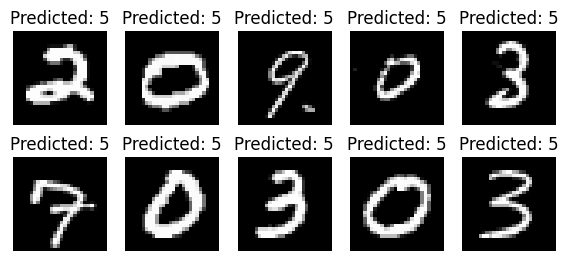

In [105]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()